# HW1 : Regression, Cross-Validation, and  Regularization

In [8]:
import os
import numpy as np
import warnings

import sklearn.preprocessing
import sklearn.pipeline
import sklearn.linear_model
import sklearn.neighbors
import sklearn.model_selection


In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set('notebook', font_scale=1.25, style='whitegrid')

# Set random seed to make all computations reproducible

In [3]:
SEED = 12345

# Load the dataset

Predefined 'x' and 'y' arrays for train/valid/test

In [4]:
DATA_DIR = 'data_auto'

In [5]:
x_tr_MF = np.loadtxt(os.path.join(DATA_DIR, 'x_train.csv'), delimiter=',', skiprows=1)
x_va_NF = np.loadtxt(os.path.join(DATA_DIR, 'x_valid.csv'), delimiter=',', skiprows=1)
x_te_PF = np.loadtxt(os.path.join(DATA_DIR, 'x_test.csv'), delimiter=',', skiprows=1)

In [6]:
y_tr_M = np.loadtxt(os.path.join(DATA_DIR, 'y_train.csv'), delimiter=',', skiprows=1)
y_va_N = np.loadtxt(os.path.join(DATA_DIR, 'y_valid.csv'), delimiter=',', skiprows=1)
y_te_P = np.loadtxt(os.path.join(DATA_DIR, 'y_test.csv'), delimiter=',', skiprows=1)

# Load completed code

In [9]:
from cross_validation import train_models_and_calc_scores_for_n_fold_cv
from performance_metrics import calc_mean_squared_error

# Define useful plotting functions

In [10]:
def plot_train_and_valid_error_vs_degree(
        degree_list, err_tr_list=None, err_va_list=None):
    ''' Plot provided errors versus degrees on a new figure
    '''
    if err_va_list is not None:
        plt.plot(degree_list, err_va_list, 'rs-', label='valid');
    if err_tr_list is not None:
        plt.plot(degree_list, err_tr_list, 'bd:', label='train');
    plt.ylim([0, 74]); # Do NOT change this! Helps all reports look the same.
    plt.legend(loc='upper right'); # Always include a legend

# Define methods for building pipelines

Remember, we discussed pipelines in the lab from day04 on "Feature Engineering"

In [11]:
def make_poly_linear_regr_pipeline(degree=1):
    pipeline = sklearn.pipeline.Pipeline(
        steps=[
         ('rescaler', sklearn.preprocessing.MinMaxScaler()),
         ('poly_transformer', sklearn.preprocessing.PolynomialFeatures(degree=degree, include_bias=False)),
         ('linear_regr', sklearn.linear_model.LinearRegression()),
        ])

    # Return the constructed pipeline
    # We can treat it as if it has a 'regression' API
    # e.g. a fit and a predict method
    return pipeline

In [12]:
def make_poly_ridge_regr_pipeline(degree=1, alpha=1.0):
    pipeline = sklearn.pipeline.Pipeline(
        steps=[
         ('rescaler', sklearn.preprocessing.MinMaxScaler()),
         ('poly_transformer', sklearn.preprocessing.PolynomialFeatures(degree=degree, include_bias=False)),
         ('ridge_regr', sklearn.linear_model.Ridge(alpha=alpha)),
        ])
    
    # Return the constructed pipeline
    # We can treat it as if it has a 'regression' API
    # e.g. a fit and a predict method
    return pipeline

# Problem 1: Polynomial Degree Selection on Fixed Validation Set

In [13]:
degree_list = [1, 2, 3, 4, 5, 6, 7]
fv_err_tr_list = []
fv_err_va_list = []

pipeline_list = []
for degree in degree_list:

    # TODO create a pipeline using features with current degree value
    pipeline = make_poly_linear_regr_pipeline(degree)

    # TODO train this pipeline on provided training data
    pipeline.fit(x_tr_MF, y_tr_M)
    
    # Compute training error
    
    yhat_tr_M = pipeline.predict(x_tr_MF)  # TODO fixme
    err_tr = calc_mean_squared_error(y_tr_M, yhat_tr_M) # TODO fixme
    
    # Compute validation error
    yhat_va_N = pipeline.predict(x_va_NF)  # TODO fixme
    err_va = calc_mean_squared_error(y_va_N, yhat_va_N) # TODO fixme

    fv_err_tr_list.append(err_tr)
    fv_err_va_list.append(err_va)

### Figure 1: Error vs degree

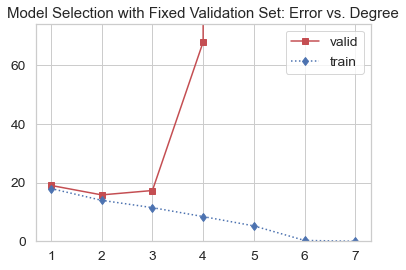

In [14]:
plot_train_and_valid_error_vs_degree(degree_list, fv_err_tr_list, fv_err_va_list);
plt.title('Model Selection with Fixed Validation Set: Error vs. Degree');
plt.savefig('figure1-err_vs_degree-fv.pdf')

### Prediction 1: Score on the test set using the chosen model

In [33]:
# TODO compute score on test set for later
pipeline = make_poly_linear_regr_pipeline(degree=2)
pipeline.fit(x_tr_MF, y_tr_M)
yhat_test_P = pipeline.predict(x_te_PF)  # TODO fixme
err_test = calc_mean_squared_error(y_te_P, yhat_test_P) # TODO fixme


In [34]:
print("Selected Parameters:")
print("Degree 2")
print("Fixed validation set estimate of heldout error:")
print("what is this?")
print("Error on the test-set:")
print(err_test)

Selected Parameters:
Degree 2
Fixed validation set estimate of heldout error:
what is this?
Error on the test-set:
15.932092578370812


# Problem 2: Cross Validation for Polynomial Feature Regression

In [35]:
x_trva_LF = np.concatenate((x_tr_MF, x_va_NF))  # TODO fix concat your train and validation set x values

y_trva_L = np.concatenate((y_tr_M, y_va_N))   # TODO fix concat your train and validation set y values


In [36]:
K = 10 # num folds

degree_list = [1, 2, 3, 4, 5, 6, 7]
cv_err_tr_list = []
cv_err_va_list = []

for degree in degree_list:

    # TODO create a pipeline using features with current degree value
    test_pipeline = make_poly_linear_regr_pipeline(degree)
    # TODO call your function to train a separate model for each fold and return train and valid errors
    # Don't forget to pass random_state = SEED (where SEED is defined above) so its reproducible
    #  = train_models_and_calc_scores_for_n_fold_cv() # TODO

    tr_error_K, valid_error_K = (train_models_and_calc_scores_for_n_fold_cv(test_pipeline, x_trva_LF, y_trva_L, K, np.random.RandomState(SEED)))
    
    err_tr = np.average(tr_error_K) # TODO fixme, compute average error across all train folds
    err_va = np.average(valid_error_K) # TODO fixme, compute average error across all heldout folds

    cv_err_tr_list.append(err_tr)
    cv_err_va_list.append(err_va)

[array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  12,  13,  14,
        15,  16,  17,  18,  19,  21,  22,  23,  24,  25,  26,  27,  28,
        29,  31,  32,  34,  36,  37,  38,  39,  41,  42,  43,  44,  45,
        46,  47,  48,  49,  50,  51,  56,  57,  58,  59,  60,  61,  62,
        63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  86,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98, 100, 102, 104, 105, 106, 107,
       108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121,
       122, 123, 124, 125, 126, 127, 129, 130, 131, 133, 134, 135, 136,
       137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 149, 150,
       151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 165, 166,
       167, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180,
       181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193,
       194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 2

FOLD:  [[1.150e+02 2.595e+03 6.000e+00 1.730e+02]
 [1.500e+02 4.457e+03 8.000e+00 3.180e+02]
 [1.050e+02 3.897e+03 6.000e+00 2.500e+02]
 ...
 [8.500e+01 3.070e+03 6.000e+00 2.000e+02]
 [1.000e+02 3.288e+03 6.000e+00 2.320e+02]
 [8.400e+01 2.635e+03 4.000e+00 1.510e+02]]
[25.05637928 13.99006701 16.30501437  7.51628256 19.40009394 14.91006031
 27.3047341  32.29629281 27.51181149 27.91117801 17.87475795 28.84254476
 26.75062709 16.37429702 31.96539178 32.65953675 30.27236038 21.4884652
 15.51426769 27.59145353 31.70404322 12.88698843 27.03051354 24.313897
 31.30379791 23.1505003  26.15756278 15.64783721 19.79144775 15.72673619
 13.24456945 31.95295861 29.98253029 27.37497519 22.99609696 37.51190456
 29.13100258 22.38911079 32.49555314 28.15902289 12.28416547 19.6779918
 13.12084452 14.77811148 28.44270106 29.10777842 20.03893059 16.69272742
 18.73627137 15.6431844  21.30387664 32.66745556 31.71625737 26.58199163
 18.72270965 32.72672338 18.59796517 26.09532262 36.06260359 26.26565347
 31

       289, 290, 291])]
(292, 4)
[array([222, 168,  99,  33,  30, 164, 163,  55,  52, 290, 162, 246,  73,
       101, 132,  87,  85,  53, 128,  40, 248, 110, 220,  20,  35,  11,
        10, 148, 103,  54]), array([100, 175,  67, 113, 234, 213, 269,  16, 184, 237, 141, 179, 176,
       284, 227, 165,  50, 275,  47, 271, 145, 221, 279,  68,  57, 211,
       159, 106,  18, 277]), array([256,  75,  97, 127, 205, 161, 186, 112,  71, 160, 212, 150, 147,
       282, 258,  70, 261, 217, 207, 134, 120, 130, 228, 196, 260, 283,
       274,   9, 240]), array([229, 241, 249, 259, 115,  44, 183,  89, 214, 215,  39,  27, 245,
        14, 156,  17, 167,  15, 225, 152,  49,  19, 188,  42,  66,  31,
       242, 266,  48]), array([169, 117, 180,  95, 244, 191, 230, 174, 144, 122,  56,  26, 140,
         1,  93, 104, 268, 253, 281, 206,  92, 181,  25, 187, 139, 198,
       239,  94, 151]), array([ 61, 219,  78, 109,  24,  51, 157, 265,   2, 126, 203, 182,  84,
        13, 173, 170, 131,   4, 135,  28,  9

 18.20635986 20.61004639 16.612854   25.84042358]
[ 2.69211731e+01  2.59389648e+01  3.41277771e+01  3.33560181e+01
  1.63163452e+01  2.64291687e+01  2.18791199e+01  2.88010864e+01
  1.12559204e+01  2.44465332e+01  1.31245728e+01  3.52706299e+01
  3.37414246e+01  2.29385681e+01  2.53657227e+01 -1.88265570e+03
  2.69854126e+01  2.75667419e+01  2.28528137e+01  1.97675171e+01
  1.51211548e+01  1.44048462e+01  2.91359558e+01  7.75982666e+00
  2.75584106e+01 -1.04441791e+03  3.61541138e+01  6.21693577e+09
 -4.87453607e+03  2.46226501e+01]
FOLD:  [[1.150e+02 2.595e+03 6.000e+00 1.730e+02]
 [1.800e+02 4.380e+03 8.000e+00 3.500e+02]
 [1.500e+02 4.457e+03 8.000e+00 3.180e+02]
 ...
 [8.500e+01 3.070e+03 6.000e+00 2.000e+02]
 [1.000e+02 3.288e+03 6.000e+00 2.320e+02]
 [8.400e+01 2.635e+03 4.000e+00 1.510e+02]]
[28.94885254 16.41955566 14.47424316 16.17346191  8.95861816 21.02697754
 14.42736816 26.40124512 29.83862305 31.27185059 18.27404785 29.5949707
 25.44250488 14.88830566 36.35266113 36.87011

 17.99182987 20.78437138 17.9738245  26.55576801]
[ 2.17151756e+02 -9.39440069e+01  6.71804442e+01 -5.44701681e+05
 -5.01594453e+05 -1.55092848e+02 -9.60248131e+03  5.59414659e+01
  4.44367257e+02 -3.33854208e+01  2.94096261e+02  3.69532528e+01
  3.54078732e+01  2.36341166e+03  1.03245008e+03  1.37188396e+07
  1.56851983e+05  1.16911369e+02  6.94191523e+01  7.78958742e+04
  3.93853235e+01 -6.76365175e+04  2.04211512e+01 -4.42933900e+05
  3.17912207e+01  5.89577397e+07  3.81956987e+01 -1.15229448e+08
 -1.16650346e+08 -6.70100482e+02]
FOLD:  [[1.150e+02 2.595e+03 6.000e+00 1.730e+02]
 [1.800e+02 4.380e+03 8.000e+00 3.500e+02]
 [1.500e+02 4.457e+03 8.000e+00 3.180e+02]
 ...
 [8.500e+01 3.070e+03 6.000e+00 2.000e+02]
 [1.000e+02 3.288e+03 6.000e+00 2.320e+02]
 [8.400e+01 2.635e+03 4.000e+00 1.510e+02]]
[28.80001725 16.50019731 13.84290971 16.00016679  9.00038041 21.00101365
 14.20234574 27.4887255  29.90525754 31.29628803 18.49786271 27.99436791
 24.89043845 15.00019731 36.40016784 44.5646

### Figure 2: Error vs degree

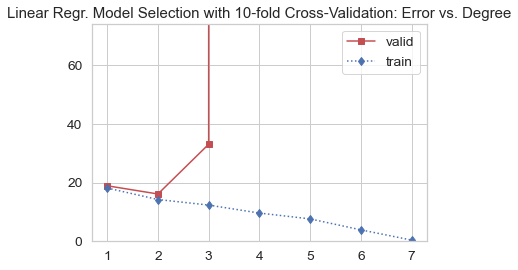

In [37]:
plot_train_and_valid_error_vs_degree(degree_list, cv_err_tr_list, cv_err_va_list)
plt.title('Linear Regr. Model Selection with 10-fold Cross-Validation: Error vs. Degree');
plt.savefig('figure2-err_vs_degree-cv-seed=%d.pdf' % SEED)

### Prediction 2: Score on the test set using the chosen model

Use the chosen hyperparameters, retrain ONE model on the FULL train+valid set.
Then make predictions on the heldout test set.

In [38]:
# TODO compute score on test set for later

pipeline = make_poly_linear_regr_pipeline(2)
pipeline.fit(x_trva_LF, y_trva_L)
yhat_test_poly = pipeline.predict(x_te_PF)
err_test = calc_mean_squared_error(y_te_P, yhat_test_poly) # TODO fixme


In [39]:
print("Selected Parameters:")
print("Degree 2")
print("10-fold CV estimate of heldout error:")
print("TODO")
print("Error on the test-set:")
print(err_test)

Selected Parameters:
Degree 2
10-fold CV estimate of heldout error:
TODO
Error on the test-set:
15.334679184359443


# Problem 3: Cross Validation for Ridge Regression

In [40]:
alpha_grid = np.logspace(-6, 6, 13) # 10^-6, 10^-5, 10^-4, ... 10^-1, 10^0, 10^1, ... 10^6

degree_list = [1, 2, 3, 4, 5, 6, 7]

K = 10 # num folds
ridge_cv_err_tr_list = []
ridge_cv_err_va_list = []

ridge_param_list = list()

for degree in degree_list:
    for alpha in alpha_grid:
        ridge_param_list.append(dict(alpha=alpha, degree=degree))
        # TODO create a pipeline using features with current degree value
        ridge_pipeline = make_poly_ridge_regr_pipeline(degree, alpha)
        # TODO call your function to train a separate model for each fold and return train and valid errors
        # Don't forget to pass random_state = SEED (where SEED is defined above) so its reproducible
        tr_error_K, valid_error_K = train_models_and_calc_scores_for_n_fold_cv(pipeline, x_trva_LF, y_trva_L, K, np.random.RandomState(SEED)) # TODO
    
        err_tr = np.average(tr_error_K) # TODO fixme, compute average error across all train folds
        err_va = np.average(valid_error_K) # TODO fixme, compute average error across all heldout folds
    
        ridge_cv_err_tr_list.append(err_tr)
        ridge_cv_err_va_list.append(err_va)

[array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  12,  13,  14,
        15,  16,  17,  18,  19,  21,  22,  23,  24,  25,  26,  27,  28,
        29,  31,  32,  34,  36,  37,  38,  39,  41,  42,  43,  44,  45,
        46,  47,  48,  49,  50,  51,  56,  57,  58,  59,  60,  61,  62,
        63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  86,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98, 100, 102, 104, 105, 106, 107,
       108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121,
       122, 123, 124, 125, 126, 127, 129, 130, 131, 133, 134, 135, 136,
       137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 149, 150,
       151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 165, 166,
       167, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180,
       181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193,
       194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 2

[22.7609453  12.7907871  13.93364239 17.12233855  9.97634312 19.42638335
 15.37133102 28.07988379 32.08989883 27.20451681 27.67202455 27.53256203
 15.81932087 29.09116538 32.94854172 30.68624064 21.22723129 16.15123609
 32.06297577 14.96744092 25.21173813 23.22289195 32.82641882 30.21732611
 31.69701898 22.58538008 24.59818898 20.897865   16.36618245 32.27199873
 26.17059055 24.25990745 35.24189557 29.50962906 32.91032594 28.38383926
 13.56608542 20.34154204 14.02201985 15.13766717 27.86612946 29.66635481
 21.6236149  17.34962272 19.21470387 14.35832821 26.58252599 18.97403139
 33.46485057 18.78577662 25.64238148 35.49208587 27.07072154 31.80406673
 13.90053915 13.65561929 33.72200739 15.37667484 30.5636101  13.89914886
 26.85580575 35.00221977 36.12651272 16.81811332 23.97926353 20.27114942
 11.01323259 32.50237732 20.36462985 27.87420526 30.56011931 31.3180631
 31.25278892 21.55829999 15.41940805 17.11200275 22.83770242 29.15560313
 25.63841548 15.42956176 33.43842143 32.18457008 33.

       289, 290, 291])]
(292, 4)
[array([222, 168,  99,  33,  30, 164, 163,  55,  52, 290, 162, 246,  73,
       101, 132,  87,  85,  53, 128,  40, 248, 110, 220,  20,  35,  11,
        10, 148, 103,  54]), array([100, 175,  67, 113, 234, 213, 269,  16, 184, 237, 141, 179, 176,
       284, 227, 165,  50, 275,  47, 271, 145, 221, 279,  68,  57, 211,
       159, 106,  18, 277]), array([256,  75,  97, 127, 205, 161, 186, 112,  71, 160, 212, 150, 147,
       282, 258,  70, 261, 217, 207, 134, 120, 130, 228, 196, 260, 283,
       274,   9, 240]), array([229, 241, 249, 259, 115,  44, 183,  89, 214, 215,  39,  27, 245,
        14, 156,  17, 167,  15, 225, 152,  49,  19, 188,  42,  66,  31,
       242, 266,  48]), array([169, 117, 180,  95, 244, 191, 230, 174, 144, 122,  56,  26, 140,
         1,  93, 104, 268, 253, 281, 206,  92, 181,  25, 187, 139, 198,
       239,  94, 151]), array([ 61, 219,  78, 109,  24,  51, 157, 265,   2, 126, 203, 182,  84,
        13, 173, 170, 131,   4, 135,  28,  9

 24.34978239 30.03044183 17.39429246 20.70685123 19.85089758]
[30.58464893 14.97644385 14.30156923 33.03732414 35.60807716 23.13115255
 15.29157327 24.1593743  36.2867447  23.80521559 32.00795729 27.02966634
 15.30415598 35.11023566 25.76201173 20.47638044 26.44948846 27.87222427
 31.38592774 33.78162158 25.33047503 34.26440357 35.69074075 19.48404579
 35.32336816 22.97744278 32.96177679 16.2067671  23.99575017]
FOLD:  [[1.150e+02 2.595e+03 6.000e+00 1.730e+02]
 [1.800e+02 4.380e+03 8.000e+00 3.500e+02]
 [1.500e+02 4.457e+03 8.000e+00 3.180e+02]
 ...
 [8.500e+01 3.070e+03 6.000e+00 2.000e+02]
 [1.000e+02 3.288e+03 6.000e+00 2.320e+02]
 [8.400e+01 2.635e+03 4.000e+00 1.510e+02]]
[23.11927408 12.65295418 13.71871632 17.17166337  9.4753514  19.28082686
 15.30390205 27.99192955 32.22034431 27.14896256 27.38678662 19.35405681
 27.77378535 27.45247111 15.72767781 29.09483111 33.1924487  30.78363028
 20.90652915 16.16649471 26.69513501 32.2245126  14.78823343 23.69908152
 33.03565147 30.30092

       289, 290, 291])]
(292, 4)
[array([222, 168,  99,  33,  30, 164, 163,  55,  52, 290, 162, 246,  73,
       101, 132,  87,  85,  53, 128,  40, 248, 110, 220,  20,  35,  11,
        10, 148, 103,  54]), array([100, 175,  67, 113, 234, 213, 269,  16, 184, 237, 141, 179, 176,
       284, 227, 165,  50, 275,  47, 271, 145, 221, 279,  68,  57, 211,
       159, 106,  18, 277]), array([256,  75,  97, 127, 205, 161, 186, 112,  71, 160, 212, 150, 147,
       282, 258,  70, 261, 217, 207, 134, 120, 130, 228, 196, 260, 283,
       274,   9, 240]), array([229, 241, 249, 259, 115,  44, 183,  89, 214, 215,  39,  27, 245,
        14, 156,  17, 167,  15, 225, 152,  49,  19, 188,  42,  66,  31,
       242, 266,  48]), array([169, 117, 180,  95, 244, 191, 230, 174, 144, 122,  56,  26, 140,
         1,  93, 104, 268, 253, 281, 206,  92, 181,  25, 187, 139, 198,
       239,  94, 151]), array([ 61, 219,  78, 109,  24,  51, 157, 265,   2, 126, 203, 182,  84,
        13, 173, 170, 131,   4, 135,  28,  9

[26.887319   30.45068124 14.88471275 14.10714095 15.31966004 32.95937655
 16.11786886 32.08943102 15.77873295 19.87741593 32.37586893 23.499907
 27.1034149  25.27736311 34.90734469 16.38008378 28.75857205 15.76915895
 10.95779161 21.62441379 29.44789222 25.42800648 12.87809777 26.57570557
 30.37181244 19.18803043 27.41210122 25.905808   15.22786386 32.92020615]
FOLD:  [[1.150e+02 2.595e+03 6.000e+00 1.730e+02]
 [1.800e+02 4.380e+03 8.000e+00 3.500e+02]
 [1.500e+02 4.457e+03 8.000e+00 3.180e+02]
 ...
 [8.500e+01 3.070e+03 6.000e+00 2.000e+02]
 [1.000e+02 3.288e+03 6.000e+00 2.320e+02]
 [8.400e+01 2.635e+03 4.000e+00 1.510e+02]]
[22.85900205 12.70839981 13.72112579 17.05013383  9.42139222 19.29284321
 15.32863044 28.49419297 32.07352267 27.67017043 27.91670703 19.33250848
 28.37730369 28.07543731 15.68009097 28.4754499  30.86219653 16.05955063
 26.52870104 32.11422122 14.92525122 25.08652156 23.81516053 32.92393581
 30.46799529 31.99731853 22.7713547  25.14364764 15.36626309 20.74779092


 [8.400e+01 2.635e+03 4.000e+00 1.510e+02]]
[22.06692265 12.97009265 14.16019889 17.06946677 10.12600094 19.39008311
 15.495485   27.72198543 32.10473205 27.79914321 19.07446321 27.6269894
 27.07583963 16.05486526 28.72469213 33.10613356 30.78101083 21.99669256
 16.27027592 27.08515755 32.13061736 14.81326224 24.41691479 21.77487598
 32.54385682 30.27394645 31.31009137 21.60213713 24.85008939 15.07543241
 20.89281267 16.574847   14.12981544 32.5908085  30.44014474 26.03021437
 23.16525708 35.54582876 29.19641443 21.41646192 33.19031645 28.5501428
 13.47267171 20.40573032 14.07056845 15.32696987 28.01178143 29.25618152
 21.36838609 17.57903899 19.12649284 15.88568397 14.71924451 32.69739112
 32.17073657 14.2448496  26.1829042  18.88679894 33.99049333 18.73521712
 25.78075239 35.78952413 26.70425093 31.83620822 13.94071471 13.65545764
 33.81194003 15.43159274 30.29471546 34.6595831  26.6056901  36.29529905
 22.26359802 20.51774281 11.07752676 32.41416532 20.51105989 28.02339534
 30.29000

FOLD:  [[1.150e+02 2.595e+03 6.000e+00 1.730e+02]
 [1.800e+02 4.380e+03 8.000e+00 3.500e+02]
 [1.500e+02 4.457e+03 8.000e+00 3.180e+02]
 ...
 [8.500e+01 3.070e+03 6.000e+00 2.000e+02]
 [1.000e+02 3.288e+03 6.000e+00 2.320e+02]
 [8.400e+01 2.635e+03 4.000e+00 1.510e+02]]
[23.11927408 12.65295418 13.71871632 17.17166337  9.4753514  19.28082686
 15.30390205 27.99192955 32.22034431 27.14896256 27.38678662 19.35405681
 27.77378535 27.45247111 15.72767781 29.09483111 33.1924487  30.78363028
 20.90652915 16.16649471 26.69513501 32.2245126  14.78823343 23.69908152
 33.03565147 30.30092479 31.90788078 22.76902814 15.27456297 20.98389818
 16.40905773 14.01951576 30.47589687 24.13504709 35.6012765  29.61073202
 20.77712786 33.11183452 28.36696899 20.21217265 13.96868798 14.9916112
 27.89615032 29.76518585 22.46412042 17.32772281 19.1154662  15.70606324
 15.47484423 33.16146626 32.25561981 14.31262086 26.53137742 18.91689548
 33.67230303 18.84292766 25.40362486 35.77071648 26.82033607 13.79018667


 25.57029915 19.7714701  22.95129606 19.60776204 26.55133755]
[25.67728739 22.68212774 10.25207076 16.38968219 23.08993286 18.99791085
 27.72795899 34.73618154 13.95137228 21.88010126 28.48309611 19.05050675
 31.50857475 27.60981552 32.54306173 32.63799056 35.30899859  8.10402276
 16.22507999 22.49500827 17.56834757 32.75202774 31.07739193 20.85466194
 33.61382488 33.15363104 31.88485541 21.79603586 24.66009256]
FOLD:  [[1.150e+02 2.595e+03 6.000e+00 1.730e+02]
 [1.800e+02 4.380e+03 8.000e+00 3.500e+02]
 [1.500e+02 4.457e+03 8.000e+00 3.180e+02]
 ...
 [8.500e+01 3.070e+03 6.000e+00 2.000e+02]
 [1.000e+02 3.288e+03 6.000e+00 2.320e+02]
 [8.400e+01 2.635e+03 4.000e+00 1.510e+02]]
[22.53699911 12.69706627 14.03286598 16.9227743   9.70020959 19.09389014
 15.47293013 27.85748898 27.76320161 27.98825496 18.93648029 27.65140285
 27.19657944 15.93164749 28.92320825 32.8884433  30.86051738 20.75238562
 16.14394757 27.32918204 32.14604663 15.24765947 25.18488565 23.0598
 32.66773379 30.35396702 

 20.7090437  22.37165027 19.76277446 27.01359475]
[28.39844299 25.48766253 33.5626037  15.58096152 22.7099576  34.8762804
 26.0320621  32.8510296  16.05067392 27.24166153 13.48433303 32.73147771
 30.88954208 24.86730988 23.91426172 14.63170763 16.99230709 29.80205083
 28.42226649 22.44464867 15.75795484 14.8301055  27.67273964 15.28353882
 27.31179813 21.68782186 33.49329088 29.04115287 19.8413703  29.24114844]
FOLD:  [[1.150e+02 2.595e+03 6.000e+00 1.730e+02]
 [1.800e+02 4.380e+03 8.000e+00 3.500e+02]
 [1.500e+02 4.457e+03 8.000e+00 3.180e+02]
 ...
 [8.500e+01 3.070e+03 6.000e+00 2.000e+02]
 [1.000e+02 3.288e+03 6.000e+00 2.320e+02]
 [8.400e+01 2.635e+03 4.000e+00 1.510e+02]]
[22.06692265 12.97009265 14.16019889 17.06946677 10.12600094 19.39008311
 15.495485   27.72198543 32.10473205 27.79914321 19.07446321 27.6269894
 27.07583963 16.05486526 28.72469213 33.10613356 30.78101083 21.99669256
 16.27027592 27.08515755 32.13061736 14.81326224 24.41691479 21.77487598
 32.54385682 30.2739464

 24.34978239 30.03044183 17.39429246 20.70685123 19.85089758]
[30.58464893 14.97644385 14.30156923 33.03732414 35.60807716 23.13115255
 15.29157327 24.1593743  36.2867447  23.80521559 32.00795729 27.02966634
 15.30415598 35.11023566 25.76201173 20.47638044 26.44948846 27.87222427
 31.38592774 33.78162158 25.33047503 34.26440357 35.69074075 19.48404579
 35.32336816 22.97744278 32.96177679 16.2067671  23.99575017]
FOLD:  [[1.150e+02 2.595e+03 6.000e+00 1.730e+02]
 [1.800e+02 4.380e+03 8.000e+00 3.500e+02]
 [1.500e+02 4.457e+03 8.000e+00 3.180e+02]
 ...
 [8.500e+01 3.070e+03 6.000e+00 2.000e+02]
 [1.000e+02 3.288e+03 6.000e+00 2.320e+02]
 [8.400e+01 2.635e+03 4.000e+00 1.510e+02]]
[23.11927408 12.65295418 13.71871632 17.17166337  9.4753514  19.28082686
 15.30390205 27.99192955 32.22034431 27.14896256 27.38678662 19.35405681
 27.77378535 27.45247111 15.72767781 29.09483111 33.1924487  30.78363028
 20.90652915 16.16649471 26.69513501 32.2245126  14.78823343 23.69908152
 33.03565147 30.30092

FOLD:  [[1.150e+02 2.595e+03 6.000e+00 1.730e+02]
 [1.800e+02 4.380e+03 8.000e+00 3.500e+02]
 [1.500e+02 4.457e+03 8.000e+00 3.180e+02]
 ...
 [8.500e+01 3.070e+03 6.000e+00 2.000e+02]
 [1.000e+02 3.288e+03 6.000e+00 2.320e+02]
 [8.400e+01 2.635e+03 4.000e+00 1.510e+02]]
[22.53699911 12.69706627 14.03286598 16.9227743   9.70020959 19.09389014
 15.47293013 27.85748898 27.76320161 27.98825496 18.93648029 27.65140285
 27.19657944 15.93164749 28.92320825 32.8884433  30.86051738 20.75238562
 16.14394757 27.32918204 32.14604663 15.24765947 25.18488565 23.0598
 32.66773379 30.35396702 31.45639195 22.40930989 25.04177314 14.58612669
 20.40153367 16.13002284 13.94058513 32.54900082 30.49152184 26.09264347
 23.56635708 35.47901591 29.32164188 20.9364802  33.04857473 28.70089556
 13.41772839 19.85511301 15.5265158  28.07942231 29.4116673  20.77801542
 17.3728963  18.93656481 15.67882239 14.3242954  32.75839857 32.17114262
 13.92221064 26.26206387 18.67259647 33.53960827 25.92777052 35.57324541
 26

FOLD:  [[1.150e+02 2.595e+03 6.000e+00 1.730e+02]
 [1.500e+02 4.457e+03 8.000e+00 3.180e+02]
 [1.050e+02 3.897e+03 6.000e+00 2.500e+02]
 ...
 [8.500e+01 3.070e+03 6.000e+00 2.000e+02]
 [1.000e+02 3.288e+03 6.000e+00 2.320e+02]
 [8.400e+01 2.635e+03 4.000e+00 1.510e+02]]
[22.93529518 13.61256916 17.28967386  9.62626388 19.44747809 15.04073401
 27.82523998 31.64828534 27.48519688 27.79090448 19.61412891 27.90046907
 27.33341279 15.78224312 28.3098713  32.88629449 30.51453643 21.44600905
 15.86003118 26.64211365 31.82936493 14.08059536 25.57557229 23.70199491
 31.50453637 22.66765885 24.87890898 15.28385622 21.10509481 16.16625936
 13.52006571 32.09026495 30.29035872 26.33678802 23.9389661  34.58672499
 29.39834129 21.17249337 32.73332201 28.39178591 12.76857227 20.53974038
 13.34094048 14.92305221 28.08708296 29.50554173 22.70240095 17.25150005
 19.13042242 15.565152   16.72373669 32.68955633 31.87368264 26.54136583
 18.7706817  33.44991017 18.61718139 25.67082235 35.00635514 26.68586934

FOLD:  [[1.150e+02 2.595e+03 6.000e+00 1.730e+02]
 [1.800e+02 4.380e+03 8.000e+00 3.500e+02]
 [1.050e+02 3.897e+03 6.000e+00 2.500e+02]
 ...
 [8.500e+01 3.070e+03 6.000e+00 2.000e+02]
 [1.000e+02 3.288e+03 6.000e+00 2.320e+02]
 [8.400e+01 2.635e+03 4.000e+00 1.510e+02]]
[22.88602853 12.81924699 16.94468506 19.00803242 15.60720613 28.17522628
 32.48042091 27.32494912 27.50887428 18.88267985 27.89650974 16.27665479
 29.50116776 33.11656009 30.95232023 21.91502256 16.39808984 26.92086191
 32.35182122 15.14708587 25.36621137 33.13308466 30.45644613 31.97194374
 24.63099564 15.01413716 20.55368242 16.4222861  14.1527497  32.57146838
 30.60229804 26.36789878 23.87422154 35.95404917 29.73455637 20.80246818
 33.14959325 28.56908524 13.42419388 19.67285556 14.14649461 15.27414045
 28.03074763 29.88167947 21.34079581 17.60318127 16.02611292 13.43711651
 33.21329527 32.36952384 14.29087959 26.71092847 18.93755495 33.47718846
 18.89770076 35.90515648 27.00156498 32.07276526 13.92185065 13.52804718

 30.37181244 19.18803043 27.41210122 25.905808   15.22786386 32.92020615]
FOLD:  [[1.150e+02 2.595e+03 6.000e+00 1.730e+02]
 [1.800e+02 4.380e+03 8.000e+00 3.500e+02]
 [1.500e+02 4.457e+03 8.000e+00 3.180e+02]
 ...
 [8.500e+01 3.070e+03 6.000e+00 2.000e+02]
 [1.000e+02 3.288e+03 6.000e+00 2.320e+02]
 [8.400e+01 2.635e+03 4.000e+00 1.510e+02]]
[22.85900205 12.70839981 13.72112579 17.05013383  9.42139222 19.29284321
 15.32863044 28.49419297 32.07352267 27.67017043 27.91670703 19.33250848
 28.37730369 28.07543731 15.68009097 28.4754499  30.86219653 16.05955063
 26.52870104 32.11422122 14.92525122 25.08652156 23.81516053 32.92393581
 30.46799529 31.99731853 22.7713547  25.14364764 15.36626309 20.74779092
 16.0063107  14.12230288 32.2410247  30.62550522 26.97295695 24.44507133
 34.89146897 29.99330666 21.33260664 32.79341577 28.73552999 13.48322088
 20.02720406 14.07373132 15.02313037 30.14755524 22.14683797 19.10715035
 15.69348107 15.7524966  33.00580032 32.13730365 14.41263082 18.7692447

[22.86078683 12.78602556 13.51237276 17.02378824  9.02589109 19.42063802
 15.41938509 27.71110893 31.7364162  27.55630038 27.87557307 19.73439356
 28.03678678 27.25235515 33.016433   21.70698779 26.17399641 32.00393936
 14.67137749 25.28212362 23.2771425  32.59501405 30.22766304 22.30130679
 24.84062206 15.59242488 16.29935671 14.17060684 32.36940835 30.4322717
 26.47552596 23.29315376 35.00803984 20.03479389 32.97922021 13.57135577
 14.11458675 14.88302276 28.20089024 17.50848263 19.14545918 15.88673792
 15.22714928 32.79200274 32.05284837 14.53917793 26.59257332 18.56176894
 33.62471793 18.27087441 25.54664375 35.37656772 26.29629295 31.77212813
 13.9328621  33.60195843 15.28685717 30.43672295 13.93112735 27.17448687
 34.78939258 26.9518409  35.88493463 17.09478814 23.63216614 20.06226306
 10.74957681 32.51135541 20.34075686 28.21469902 30.43020207 31.41196354
 31.29583714 29.40356933 20.64867058 16.56812805 15.44856201 21.71186869
 29.26267375 25.58793092 15.49232042 33.16896718 32.

 30.37181244 19.18803043 27.41210122 25.905808   15.22786386 32.92020615]
FOLD:  [[1.150e+02 2.595e+03 6.000e+00 1.730e+02]
 [1.800e+02 4.380e+03 8.000e+00 3.500e+02]
 [1.500e+02 4.457e+03 8.000e+00 3.180e+02]
 ...
 [8.500e+01 3.070e+03 6.000e+00 2.000e+02]
 [1.000e+02 3.288e+03 6.000e+00 2.320e+02]
 [8.400e+01 2.635e+03 4.000e+00 1.510e+02]]
[22.85900205 12.70839981 13.72112579 17.05013383  9.42139222 19.29284321
 15.32863044 28.49419297 32.07352267 27.67017043 27.91670703 19.33250848
 28.37730369 28.07543731 15.68009097 28.4754499  30.86219653 16.05955063
 26.52870104 32.11422122 14.92525122 25.08652156 23.81516053 32.92393581
 30.46799529 31.99731853 22.7713547  25.14364764 15.36626309 20.74779092
 16.0063107  14.12230288 32.2410247  30.62550522 26.97295695 24.44507133
 34.89146897 29.99330666 21.33260664 32.79341577 28.73552999 13.48322088
 20.02720406 14.07373132 15.02313037 30.14755524 22.14683797 19.10715035
 15.69348107 15.7524966  33.00580032 32.13730365 14.41263082 18.7692447

FOLD:  [[1.150e+02 2.595e+03 6.000e+00 1.730e+02]
 [1.800e+02 4.380e+03 8.000e+00 3.500e+02]
 [1.500e+02 4.457e+03 8.000e+00 3.180e+02]
 ...
 [8.500e+01 3.070e+03 6.000e+00 2.000e+02]
 [1.000e+02 3.288e+03 6.000e+00 2.320e+02]
 [8.400e+01 2.635e+03 4.000e+00 1.510e+02]]
[22.85900205 12.70839981 13.72112579 17.05013383  9.42139222 19.29284321
 15.32863044 28.49419297 32.07352267 27.67017043 27.91670703 19.33250848
 28.37730369 28.07543731 15.68009097 28.4754499  30.86219653 16.05955063
 26.52870104 32.11422122 14.92525122 25.08652156 23.81516053 32.92393581
 30.46799529 31.99731853 22.7713547  25.14364764 15.36626309 20.74779092
 16.0063107  14.12230288 32.2410247  30.62550522 26.97295695 24.44507133
 34.89146897 29.99330666 21.33260664 32.79341577 28.73552999 13.48322088
 20.02720406 14.07373132 15.02313037 30.14755524 22.14683797 19.10715035
 15.69348107 15.7524966  33.00580032 32.13730365 14.41263082 18.76924475
 33.10190051 18.56487664 26.00982262 35.03818784 27.3061709  31.90602471

FOLD:  [[1.150e+02 2.595e+03 6.000e+00 1.730e+02]
 [1.800e+02 4.380e+03 8.000e+00 3.500e+02]
 [1.500e+02 4.457e+03 8.000e+00 3.180e+02]
 ...
 [8.800e+01 3.139e+03 6.000e+00 2.500e+02]
 [8.500e+01 3.070e+03 6.000e+00 2.000e+02]
 [8.400e+01 2.635e+03 4.000e+00 1.510e+02]]
[22.7609453  12.7907871  13.93364239 17.12233855  9.97634312 19.42638335
 15.37133102 28.07988379 32.08989883 27.20451681 27.67202455 27.53256203
 15.81932087 29.09116538 32.94854172 30.68624064 21.22723129 16.15123609
 32.06297577 14.96744092 25.21173813 23.22289195 32.82641882 30.21732611
 31.69701898 22.58538008 24.59818898 20.897865   16.36618245 32.27199873
 26.17059055 24.25990745 35.24189557 29.50962906 32.91032594 28.38383926
 13.56608542 20.34154204 14.02201985 15.13766717 27.86612946 29.66635481
 21.6236149  17.34962272 19.21470387 14.35832821 26.58252599 18.97403139
 33.46485057 18.78577662 25.64238148 35.49208587 27.07072154 31.80406673
 13.90053915 13.65561929 33.72200739 15.37667484 30.5636101  13.89914886

FOLD:  [[1.150e+02 2.595e+03 6.000e+00 1.730e+02]
 [1.800e+02 4.380e+03 8.000e+00 3.500e+02]
 [1.500e+02 4.457e+03 8.000e+00 3.180e+02]
 ...
 [8.500e+01 3.070e+03 6.000e+00 2.000e+02]
 [1.000e+02 3.288e+03 6.000e+00 2.320e+02]
 [8.400e+01 2.635e+03 4.000e+00 1.510e+02]]
[22.85900205 12.70839981 13.72112579 17.05013383  9.42139222 19.29284321
 15.32863044 28.49419297 32.07352267 27.67017043 27.91670703 19.33250848
 28.37730369 28.07543731 15.68009097 28.4754499  30.86219653 16.05955063
 26.52870104 32.11422122 14.92525122 25.08652156 23.81516053 32.92393581
 30.46799529 31.99731853 22.7713547  25.14364764 15.36626309 20.74779092
 16.0063107  14.12230288 32.2410247  30.62550522 26.97295695 24.44507133
 34.89146897 29.99330666 21.33260664 32.79341577 28.73552999 13.48322088
 20.02720406 14.07373132 15.02313037 30.14755524 22.14683797 19.10715035
 15.69348107 15.7524966  33.00580032 32.13730365 14.41263082 18.76924475
 33.10190051 18.56487664 26.00982262 35.03818784 27.3061709  31.90602471

[32.21148599 19.69522697 19.84146768 16.48404368 24.15383744 24.3997539
 27.57149059 25.22788427 15.40655179 29.9259191  17.53730297 16.19987306
 22.22169458 18.86289363 23.2134548  34.76244848 14.93793861 19.7013045
 34.0180104  22.78740409 15.52248645 27.0220122  31.16105354 28.1574069
 27.79662245 29.01549411 19.18198404 15.0217921  14.32412988]
FOLD:  [[ 115. 2595.    6.  173.]
 [ 180. 4380.    8.  350.]
 [ 150. 4457.    8.  318.]
 ...
 [ 120. 3410.    6.  258.]
 [  88. 3139.    6.  250.]
 [ 100. 3288.    6.  232.]]
[23.15980528 12.64871986 13.82938992 17.04010153  9.68212456 15.24438059
 27.90312575 31.93003663 27.15769209 27.44633845 19.14159523 27.39540554
 15.82367294 28.94926086 33.26828649 30.64127423 21.72252063 16.02361957
 26.10567617 32.104706   25.76687923 23.49119575 32.92444628 30.20380087
 31.81693937 22.76931482 24.52211105 15.09655223 20.88702122 16.25940423
 13.93285444 32.27046861 30.40843386 26.25913274 24.12218557 29.54838556
 21.05932795 28.28517916 13.57089239

[22.93529518 13.61256916 17.28967386  9.62626388 19.44747809 15.04073401
 27.82523998 31.64828534 27.48519688 27.79090448 19.61412891 27.90046907
 27.33341279 15.78224312 28.3098713  32.88629449 30.51453643 21.44600905
 15.86003118 26.64211365 31.82936493 14.08059536 25.57557229 23.70199491
 31.50453637 22.66765885 24.87890898 15.28385622 21.10509481 16.16625936
 13.52006571 32.09026495 30.29035872 26.33678802 23.9389661  34.58672499
 29.39834129 21.17249337 32.73332201 28.39178591 12.76857227 20.53974038
 13.34094048 14.92305221 28.08708296 29.50554173 22.70240095 17.25150005
 19.13042242 15.565152   16.72373669 32.68955633 31.87368264 26.54136583
 18.7706817  33.44991017 18.61718139 25.67082235 35.00635514 26.68586934
 31.61305563 13.30488747 12.66129588 33.38861595 14.98950989 30.37160312
 13.45764563 27.15214036 34.72923596 26.9724925  35.5775961  16.6451538
 24.59914187 20.65758135 10.73519185 32.38957133 20.65235991 28.1011902
 30.3662605  31.22472218 31.11415841 29.21830646 21.2

 [8.400e+01 2.635e+03 4.000e+00 1.510e+02]]
[22.06692265 12.97009265 14.16019889 17.06946677 10.12600094 19.39008311
 15.495485   27.72198543 32.10473205 27.79914321 19.07446321 27.6269894
 27.07583963 16.05486526 28.72469213 33.10613356 30.78101083 21.99669256
 16.27027592 27.08515755 32.13061736 14.81326224 24.41691479 21.77487598
 32.54385682 30.27394645 31.31009137 21.60213713 24.85008939 15.07543241
 20.89281267 16.574847   14.12981544 32.5908085  30.44014474 26.03021437
 23.16525708 35.54582876 29.19641443 21.41646192 33.19031645 28.5501428
 13.47267171 20.40573032 14.07056845 15.32696987 28.01178143 29.25618152
 21.36838609 17.57903899 19.12649284 15.88568397 14.71924451 32.69739112
 32.17073657 14.2448496  26.1829042  18.88679894 33.99049333 18.73521712
 25.78075239 35.78952413 26.70425093 31.83620822 13.94071471 13.65545764
 33.81194003 15.43159274 30.29471546 34.6595831  26.6056901  36.29529905
 22.26359802 20.51774281 11.07752676 32.41416532 20.51105989 28.02339534
 30.29000

 25.52587237 20.72545995 22.8974691  26.49899652]
[26.887319   30.45068124 14.88471275 14.10714095 15.31966004 32.95937655
 16.11786886 32.08943102 15.77873295 19.87741593 32.37586893 23.499907
 27.1034149  25.27736311 34.90734469 16.38008378 28.75857205 15.76915895
 10.95779161 21.62441379 29.44789222 25.42800648 12.87809777 26.57570557
 30.37181244 19.18803043 27.41210122 25.905808   15.22786386 32.92020615]
FOLD:  [[1.150e+02 2.595e+03 6.000e+00 1.730e+02]
 [1.800e+02 4.380e+03 8.000e+00 3.500e+02]
 [1.500e+02 4.457e+03 8.000e+00 3.180e+02]
 ...
 [8.500e+01 3.070e+03 6.000e+00 2.000e+02]
 [1.000e+02 3.288e+03 6.000e+00 2.320e+02]
 [8.400e+01 2.635e+03 4.000e+00 1.510e+02]]
[22.85900205 12.70839981 13.72112579 17.05013383  9.42139222 19.29284321
 15.32863044 28.49419297 32.07352267 27.67017043 27.91670703 19.33250848
 28.37730369 28.07543731 15.68009097 28.4754499  30.86219653 16.05955063
 26.52870104 32.11422122 14.92525122 25.08652156 23.81516053 32.92393581
 30.46799529 31.9973185

 24.34978239 30.03044183 17.39429246 20.70685123 19.85089758]
[30.58464893 14.97644385 14.30156923 33.03732414 35.60807716 23.13115255
 15.29157327 24.1593743  36.2867447  23.80521559 32.00795729 27.02966634
 15.30415598 35.11023566 25.76201173 20.47638044 26.44948846 27.87222427
 31.38592774 33.78162158 25.33047503 34.26440357 35.69074075 19.48404579
 35.32336816 22.97744278 32.96177679 16.2067671  23.99575017]
FOLD:  [[1.150e+02 2.595e+03 6.000e+00 1.730e+02]
 [1.800e+02 4.380e+03 8.000e+00 3.500e+02]
 [1.500e+02 4.457e+03 8.000e+00 3.180e+02]
 ...
 [8.500e+01 3.070e+03 6.000e+00 2.000e+02]
 [1.000e+02 3.288e+03 6.000e+00 2.320e+02]
 [8.400e+01 2.635e+03 4.000e+00 1.510e+02]]
[23.11927408 12.65295418 13.71871632 17.17166337  9.4753514  19.28082686
 15.30390205 27.99192955 32.22034431 27.14896256 27.38678662 19.35405681
 27.77378535 27.45247111 15.72767781 29.09483111 33.1924487  30.78363028
 20.90652915 16.16649471 26.69513501 32.2245126  14.78823343 23.69908152
 33.03565147 30.30092

 25.67503049 21.51869467 22.63244464 19.91335662 27.13792091]
[10.10235251 12.53479891 35.29517319 32.05120396 23.10961996 15.52802651
 36.05395277 22.79994129 26.33356072 17.68522833 14.1347566  30.09902384
 20.72699619 11.87950593 15.09992294  9.68904578 16.28572037 19.31343487
 15.23128837 23.1572735  25.5889961  13.91873764 32.52187852 20.87473545
 13.87180299 31.6238715  25.14760296 33.04623636 18.98482434]
FOLD:  [[1.150e+02 2.595e+03 6.000e+00 1.730e+02]
 [1.800e+02 4.380e+03 8.000e+00 3.500e+02]
 [1.050e+02 3.897e+03 6.000e+00 2.500e+02]
 ...
 [8.500e+01 3.070e+03 6.000e+00 2.000e+02]
 [1.000e+02 3.288e+03 6.000e+00 2.320e+02]
 [8.400e+01 2.635e+03 4.000e+00 1.510e+02]]
[22.88602853 12.81924699 16.94468506 19.00803242 15.60720613 28.17522628
 32.48042091 27.32494912 27.50887428 18.88267985 27.89650974 16.27665479
 29.50116776 33.11656009 30.95232023 21.91502256 16.39808984 26.92086191
 32.35182122 15.14708587 25.36621137 33.13308466 30.45644613 31.97194374
 24.63099564 15.01413

 25.79616175 20.65966622 22.92431496 19.82628213 27.06490255]
[20.78277027 16.97039517 19.48022167 17.65323538 16.67994356 33.63510094
 26.46334529 29.57761738 27.25296387 14.50302562 14.17964893 20.44545429
 32.31466065 34.09086202 13.50320012 13.89416999 29.907605   33.6208769
 13.49965663 22.44624873 35.52982608 27.38461684 19.48445731 18.43883979
 17.90593383 15.50791407 11.65791259 27.54432081 18.62770292]
FOLD:  [[1.150e+02 2.595e+03 6.000e+00 1.730e+02]
 [1.800e+02 4.380e+03 8.000e+00 3.500e+02]
 [1.500e+02 4.457e+03 8.000e+00 3.180e+02]
 ...
 [8.500e+01 3.070e+03 6.000e+00 2.000e+02]
 [1.000e+02 3.288e+03 6.000e+00 2.320e+02]
 [8.400e+01 2.635e+03 4.000e+00 1.510e+02]]
[22.86078683 12.78602556 13.51237276 17.02378824  9.02589109 19.42063802
 15.41938509 27.71110893 31.7364162  27.55630038 27.87557307 19.73439356
 28.03678678 27.25235515 33.016433   21.70698779 26.17399641 32.00393936
 14.67137749 25.28212362 23.2771425  32.59501405 30.22766304 22.30130679
 24.84062206 15.592424

FOLD:  [[1.150e+02 2.595e+03 6.000e+00 1.730e+02]
 [1.800e+02 4.380e+03 8.000e+00 3.500e+02]
 [1.500e+02 4.457e+03 8.000e+00 3.180e+02]
 ...
 [8.500e+01 3.070e+03 6.000e+00 2.000e+02]
 [1.000e+02 3.288e+03 6.000e+00 2.320e+02]
 [8.400e+01 2.635e+03 4.000e+00 1.510e+02]]
[22.06692265 12.97009265 14.16019889 17.06946677 10.12600094 19.39008311
 15.495485   27.72198543 32.10473205 27.79914321 19.07446321 27.6269894
 27.07583963 16.05486526 28.72469213 33.10613356 30.78101083 21.99669256
 16.27027592 27.08515755 32.13061736 14.81326224 24.41691479 21.77487598
 32.54385682 30.27394645 31.31009137 21.60213713 24.85008939 15.07543241
 20.89281267 16.574847   14.12981544 32.5908085  30.44014474 26.03021437
 23.16525708 35.54582876 29.19641443 21.41646192 33.19031645 28.5501428
 13.47267171 20.40573032 14.07056845 15.32696987 28.01178143 29.25618152
 21.36838609 17.57903899 19.12649284 15.88568397 14.71924451 32.69739112
 32.17073657 14.2448496  26.1829042  18.88679894 33.99049333 18.73521712
 

 20.7090437  22.37165027 19.76277446 27.01359475]
[28.39844299 25.48766253 33.5626037  15.58096152 22.7099576  34.8762804
 26.0320621  32.8510296  16.05067392 27.24166153 13.48433303 32.73147771
 30.88954208 24.86730988 23.91426172 14.63170763 16.99230709 29.80205083
 28.42226649 22.44464867 15.75795484 14.8301055  27.67273964 15.28353882
 27.31179813 21.68782186 33.49329088 29.04115287 19.8413703  29.24114844]
FOLD:  [[1.150e+02 2.595e+03 6.000e+00 1.730e+02]
 [1.800e+02 4.380e+03 8.000e+00 3.500e+02]
 [1.500e+02 4.457e+03 8.000e+00 3.180e+02]
 ...
 [8.500e+01 3.070e+03 6.000e+00 2.000e+02]
 [1.000e+02 3.288e+03 6.000e+00 2.320e+02]
 [8.400e+01 2.635e+03 4.000e+00 1.510e+02]]
[22.06692265 12.97009265 14.16019889 17.06946677 10.12600094 19.39008311
 15.495485   27.72198543 32.10473205 27.79914321 19.07446321 27.6269894
 27.07583963 16.05486526 28.72469213 33.10613356 30.78101083 21.99669256
 16.27027592 27.08515755 32.13061736 14.81326224 24.41691479 21.77487598
 32.54385682 30.2739464

       289, 290, 291])]
(292, 4)
[array([222, 168,  99,  33,  30, 164, 163,  55,  52, 290, 162, 246,  73,
       101, 132,  87,  85,  53, 128,  40, 248, 110, 220,  20,  35,  11,
        10, 148, 103,  54]), array([100, 175,  67, 113, 234, 213, 269,  16, 184, 237, 141, 179, 176,
       284, 227, 165,  50, 275,  47, 271, 145, 221, 279,  68,  57, 211,
       159, 106,  18, 277]), array([256,  75,  97, 127, 205, 161, 186, 112,  71, 160, 212, 150, 147,
       282, 258,  70, 261, 217, 207, 134, 120, 130, 228, 196, 260, 283,
       274,   9, 240]), array([229, 241, 249, 259, 115,  44, 183,  89, 214, 215,  39,  27, 245,
        14, 156,  17, 167,  15, 225, 152,  49,  19, 188,  42,  66,  31,
       242, 266,  48]), array([169, 117, 180,  95, 244, 191, 230, 174, 144, 122,  56,  26, 140,
         1,  93, 104, 268, 253, 281, 206,  92, 181,  25, 187, 139, 198,
       239,  94, 151]), array([ 61, 219,  78, 109,  24,  51, 157, 265,   2, 126, 203, 182,  84,
        13, 173, 170, 131,   4, 135,  28,  9

 25.52587237 20.72545995 22.8974691  26.49899652]
[26.887319   30.45068124 14.88471275 14.10714095 15.31966004 32.95937655
 16.11786886 32.08943102 15.77873295 19.87741593 32.37586893 23.499907
 27.1034149  25.27736311 34.90734469 16.38008378 28.75857205 15.76915895
 10.95779161 21.62441379 29.44789222 25.42800648 12.87809777 26.57570557
 30.37181244 19.18803043 27.41210122 25.905808   15.22786386 32.92020615]
FOLD:  [[1.150e+02 2.595e+03 6.000e+00 1.730e+02]
 [1.800e+02 4.380e+03 8.000e+00 3.500e+02]
 [1.500e+02 4.457e+03 8.000e+00 3.180e+02]
 ...
 [8.500e+01 3.070e+03 6.000e+00 2.000e+02]
 [1.000e+02 3.288e+03 6.000e+00 2.320e+02]
 [8.400e+01 2.635e+03 4.000e+00 1.510e+02]]
[22.85900205 12.70839981 13.72112579 17.05013383  9.42139222 19.29284321
 15.32863044 28.49419297 32.07352267 27.67017043 27.91670703 19.33250848
 28.37730369 28.07543731 15.68009097 28.4754499  30.86219653 16.05955063
 26.52870104 32.11422122 14.92525122 25.08652156 23.81516053 32.92393581
 30.46799529 31.9973185

[22.85900205 12.70839981 13.72112579 17.05013383  9.42139222 19.29284321
 15.32863044 28.49419297 32.07352267 27.67017043 27.91670703 19.33250848
 28.37730369 28.07543731 15.68009097 28.4754499  30.86219653 16.05955063
 26.52870104 32.11422122 14.92525122 25.08652156 23.81516053 32.92393581
 30.46799529 31.99731853 22.7713547  25.14364764 15.36626309 20.74779092
 16.0063107  14.12230288 32.2410247  30.62550522 26.97295695 24.44507133
 34.89146897 29.99330666 21.33260664 32.79341577 28.73552999 13.48322088
 20.02720406 14.07373132 15.02313037 30.14755524 22.14683797 19.10715035
 15.69348107 15.7524966  33.00580032 32.13730365 14.41263082 18.76924475
 33.10190051 18.56487664 26.00982262 35.03818784 27.3061709  31.90602471
 13.88525074 13.24878705 30.89947691 13.86909089 27.26421105 34.88465164
 27.76327003 35.62076741 16.76043152 24.51966695 19.59783221 10.29180428
 32.59623213 19.89137591 28.43164135 30.89553969 31.43436277 31.37618621
 29.12637745 21.95732214 16.37126083 15.34895438 16

 25.55709373 21.55545081 22.77681253 19.99731432 27.15626025]
[24.00634971 18.44211735 21.67802309 22.99483189 22.53610377 20.43670174
 17.33465037 17.22115698 21.48274358 35.18365249 29.46990634 31.56648248
 19.53336165 15.64967781  9.69968191 30.65685329 27.87427245 27.63413816
 13.93656262 13.01607748 23.44111038 16.31116894 18.2411103  28.46921274
 13.62159951 21.30677056 32.22725484 35.14803664 29.54091739]
FOLD:  [[1.150e+02 2.595e+03 6.000e+00 1.730e+02]
 [1.500e+02 4.457e+03 8.000e+00 3.180e+02]
 [1.050e+02 3.897e+03 6.000e+00 2.500e+02]
 ...
 [8.500e+01 3.070e+03 6.000e+00 2.000e+02]
 [1.000e+02 3.288e+03 6.000e+00 2.320e+02]
 [8.400e+01 2.635e+03 4.000e+00 1.510e+02]]
[22.93529518 13.61256916 17.28967386  9.62626388 19.44747809 15.04073401
 27.82523998 31.64828534 27.48519688 27.79090448 19.61412891 27.90046907
 27.33341279 15.78224312 28.3098713  32.88629449 30.51453643 21.44600905
 15.86003118 26.64211365 31.82936493 14.08059536 25.57557229 23.70199491
 31.50453637 22.66765

FOLD:  [[1.150e+02 2.595e+03 6.000e+00 1.730e+02]
 [1.800e+02 4.380e+03 8.000e+00 3.500e+02]
 [1.050e+02 3.897e+03 6.000e+00 2.500e+02]
 ...
 [8.500e+01 3.070e+03 6.000e+00 2.000e+02]
 [1.000e+02 3.288e+03 6.000e+00 2.320e+02]
 [8.400e+01 2.635e+03 4.000e+00 1.510e+02]]
[22.88602853 12.81924699 16.94468506 19.00803242 15.60720613 28.17522628
 32.48042091 27.32494912 27.50887428 18.88267985 27.89650974 16.27665479
 29.50116776 33.11656009 30.95232023 21.91502256 16.39808984 26.92086191
 32.35182122 15.14708587 25.36621137 33.13308466 30.45644613 31.97194374
 24.63099564 15.01413716 20.55368242 16.4222861  14.1527497  32.57146838
 30.60229804 26.36789878 23.87422154 35.95404917 29.73455637 20.80246818
 33.14959325 28.56908524 13.42419388 19.67285556 14.14649461 15.27414045
 28.03074763 29.88167947 21.34079581 17.60318127 16.02611292 13.43711651
 33.21329527 32.36952384 14.29087959 26.71092847 18.93755495 33.47718846
 18.89770076 35.90515648 27.00156498 32.07276526 13.92185065 13.52804718

FOLD:  [[1.150e+02 2.595e+03 6.000e+00 1.730e+02]
 [1.800e+02 4.380e+03 8.000e+00 3.500e+02]
 [1.500e+02 4.457e+03 8.000e+00 3.180e+02]
 ...
 [8.500e+01 3.070e+03 6.000e+00 2.000e+02]
 [1.000e+02 3.288e+03 6.000e+00 2.320e+02]
 [8.400e+01 2.635e+03 4.000e+00 1.510e+02]]
[22.53699911 12.69706627 14.03286598 16.9227743   9.70020959 19.09389014
 15.47293013 27.85748898 27.76320161 27.98825496 18.93648029 27.65140285
 27.19657944 15.93164749 28.92320825 32.8884433  30.86051738 20.75238562
 16.14394757 27.32918204 32.14604663 15.24765947 25.18488565 23.0598
 32.66773379 30.35396702 31.45639195 22.40930989 25.04177314 14.58612669
 20.40153367 16.13002284 13.94058513 32.54900082 30.49152184 26.09264347
 23.56635708 35.47901591 29.32164188 20.9364802  33.04857473 28.70089556
 13.41772839 19.85511301 15.5265158  28.07942231 29.4116673  20.77801542
 17.3728963  18.93656481 15.67882239 14.3242954  32.75839857 32.17114262
 13.92221064 26.26206387 18.67259647 33.53960827 25.92777052 35.57324541
 26

FOLD:  [[1.150e+02 2.595e+03 6.000e+00 1.730e+02]
 [1.800e+02 4.380e+03 8.000e+00 3.500e+02]
 [1.500e+02 4.457e+03 8.000e+00 3.180e+02]
 ...
 [8.500e+01 3.070e+03 6.000e+00 2.000e+02]
 [1.000e+02 3.288e+03 6.000e+00 2.320e+02]
 [8.400e+01 2.635e+03 4.000e+00 1.510e+02]]
[22.53699911 12.69706627 14.03286598 16.9227743   9.70020959 19.09389014
 15.47293013 27.85748898 27.76320161 27.98825496 18.93648029 27.65140285
 27.19657944 15.93164749 28.92320825 32.8884433  30.86051738 20.75238562
 16.14394757 27.32918204 32.14604663 15.24765947 25.18488565 23.0598
 32.66773379 30.35396702 31.45639195 22.40930989 25.04177314 14.58612669
 20.40153367 16.13002284 13.94058513 32.54900082 30.49152184 26.09264347
 23.56635708 35.47901591 29.32164188 20.9364802  33.04857473 28.70089556
 13.41772839 19.85511301 15.5265158  28.07942231 29.4116673  20.77801542
 17.3728963  18.93656481 15.67882239 14.3242954  32.75839857 32.17114262
 13.92221064 26.26206387 18.67259647 33.53960827 25.92777052 35.57324541
 26

 [8.400e+01 2.635e+03 4.000e+00 1.510e+02]]
[23.11927408 12.65295418 13.71871632 17.17166337  9.4753514  19.28082686
 15.30390205 27.99192955 32.22034431 27.14896256 27.38678662 19.35405681
 27.77378535 27.45247111 15.72767781 29.09483111 33.1924487  30.78363028
 20.90652915 16.16649471 26.69513501 32.2245126  14.78823343 23.69908152
 33.03565147 30.30092479 31.90788078 22.76902814 15.27456297 20.98389818
 16.40905773 14.01951576 30.47589687 24.13504709 35.6012765  29.61073202
 20.77712786 33.11183452 28.36696899 20.21217265 13.96868798 14.9916112
 27.89615032 29.76518585 22.46412042 17.32772281 19.1154662  15.70606324
 15.47484423 33.16146626 32.25561981 14.31262086 26.53137742 18.91689548
 33.67230303 18.84292766 25.40362486 35.77071648 26.82033607 13.79018667
 13.32310901 33.94161201 15.40450722 30.6843437  13.78386895 26.78430728
 35.34439228 27.04814443 36.40835621 16.93276417 24.34157427 10.74317881
 32.75233903 20.1749472  30.67981324 31.46292049 31.38739218 28.90685672
 20.8993

 [8.400e+01 2.635e+03 4.000e+00 1.510e+02]]
[22.7609453  12.7907871  13.93364239 17.12233855  9.97634312 19.42638335
 15.37133102 28.07988379 32.08989883 27.20451681 27.67202455 27.53256203
 15.81932087 29.09116538 32.94854172 30.68624064 21.22723129 16.15123609
 32.06297577 14.96744092 25.21173813 23.22289195 32.82641882 30.21732611
 31.69701898 22.58538008 24.59818898 20.897865   16.36618245 32.27199873
 26.17059055 24.25990745 35.24189557 29.50962906 32.91032594 28.38383926
 13.56608542 20.34154204 14.02201985 15.13766717 27.86612946 29.66635481
 21.6236149  17.34962272 19.21470387 14.35832821 26.58252599 18.97403139
 33.46485057 18.78577662 25.64238148 35.49208587 27.07072154 31.80406673
 13.90053915 13.65561929 33.72200739 15.37667484 30.5636101  13.89914886
 26.85580575 35.00221977 36.12651272 16.81811332 23.97926353 20.27114942
 11.01323259 32.50237732 20.36462985 27.87420526 30.56011931 31.3180631
 31.25278892 21.55829999 15.41940805 17.11200275 22.83770242 29.15560313
 25.6384

       289, 290, 291])]
(292, 4)
[array([222, 168,  99,  33,  30, 164, 163,  55,  52, 290, 162, 246,  73,
       101, 132,  87,  85,  53, 128,  40, 248, 110, 220,  20,  35,  11,
        10, 148, 103,  54]), array([100, 175,  67, 113, 234, 213, 269,  16, 184, 237, 141, 179, 176,
       284, 227, 165,  50, 275,  47, 271, 145, 221, 279,  68,  57, 211,
       159, 106,  18, 277]), array([256,  75,  97, 127, 205, 161, 186, 112,  71, 160, 212, 150, 147,
       282, 258,  70, 261, 217, 207, 134, 120, 130, 228, 196, 260, 283,
       274,   9, 240]), array([229, 241, 249, 259, 115,  44, 183,  89, 214, 215,  39,  27, 245,
        14, 156,  17, 167,  15, 225, 152,  49,  19, 188,  42,  66,  31,
       242, 266,  48]), array([169, 117, 180,  95, 244, 191, 230, 174, 144, 122,  56,  26, 140,
         1,  93, 104, 268, 253, 281, 206,  92, 181,  25, 187, 139, 198,
       239,  94, 151]), array([ 61, 219,  78, 109,  24,  51, 157, 265,   2, 126, 203, 182,  84,
        13, 173, 170, 131,   4, 135,  28,  9

[12.79981929 13.86664627  9.10293978 19.23399392 32.333585   27.26164155
 27.45641776 19.67340491 27.82722731 27.62756576 15.97066521 29.22195449
 32.97415843 30.84307351 20.67897937 16.15352532 27.04717358 15.15213585
 25.15251951 23.45925002 33.00004824 30.35327781 31.8994791  22.55482222
 24.49414062 15.60048594 21.14819919 14.23087291 32.46770054 30.49872532
 26.29644304 35.73383436 29.68635962 20.92714441 33.01216017 28.48774118
 13.67169668 20.12017698 14.15676376 27.94511879 29.85361884 23.0837023
 17.16032361 19.25982978 15.8807452  15.67220519 33.07666327 32.22998145
 14.67722354 26.71295537 33.38130021 19.22038819 25.58515745 35.65915641
 31.94020525 14.00769098 13.58563326 33.85453747 15.40263057 30.73257059
 14.06552787 26.93655809 35.14540291 27.23076523 36.26179045 16.8157767
 24.07208346 19.64992884 11.00197448 32.62259921 19.95577352 27.95291686
 30.72897479 31.43939034 31.39475306 29.04526758 21.14866467 16.37848446
 15.48473389 16.9248871  22.11847879 29.43931903 25.6

[23.11927408 12.65295418 13.71871632 17.17166337  9.4753514  19.28082686
 15.30390205 27.99192955 32.22034431 27.14896256 27.38678662 19.35405681
 27.77378535 27.45247111 15.72767781 29.09483111 33.1924487  30.78363028
 20.90652915 16.16649471 26.69513501 32.2245126  14.78823343 23.69908152
 33.03565147 30.30092479 31.90788078 22.76902814 15.27456297 20.98389818
 16.40905773 14.01951576 30.47589687 24.13504709 35.6012765  29.61073202
 20.77712786 33.11183452 28.36696899 20.21217265 13.96868798 14.9916112
 27.89615032 29.76518585 22.46412042 17.32772281 19.1154662  15.70606324
 15.47484423 33.16146626 32.25561981 14.31262086 26.53137742 18.91689548
 33.67230303 18.84292766 25.40362486 35.77071648 26.82033607 13.79018667
 13.32310901 33.94161201 15.40450722 30.6843437  13.78386895 26.78430728
 35.34439228 27.04814443 36.40835621 16.93276417 24.34157427 10.74317881
 32.75233903 20.1749472  30.67981324 31.46292049 31.38739218 28.90685672
 20.89931136 16.41569007 15.33382213 17.17324427 21.

 25.52587237 20.72545995 22.8974691  26.49899652]
[26.887319   30.45068124 14.88471275 14.10714095 15.31966004 32.95937655
 16.11786886 32.08943102 15.77873295 19.87741593 32.37586893 23.499907
 27.1034149  25.27736311 34.90734469 16.38008378 28.75857205 15.76915895
 10.95779161 21.62441379 29.44789222 25.42800648 12.87809777 26.57570557
 30.37181244 19.18803043 27.41210122 25.905808   15.22786386 32.92020615]
FOLD:  [[1.150e+02 2.595e+03 6.000e+00 1.730e+02]
 [1.800e+02 4.380e+03 8.000e+00 3.500e+02]
 [1.500e+02 4.457e+03 8.000e+00 3.180e+02]
 ...
 [8.500e+01 3.070e+03 6.000e+00 2.000e+02]
 [1.000e+02 3.288e+03 6.000e+00 2.320e+02]
 [8.400e+01 2.635e+03 4.000e+00 1.510e+02]]
[22.85900205 12.70839981 13.72112579 17.05013383  9.42139222 19.29284321
 15.32863044 28.49419297 32.07352267 27.67017043 27.91670703 19.33250848
 28.37730369 28.07543731 15.68009097 28.4754499  30.86219653 16.05955063
 26.52870104 32.11422122 14.92525122 25.08652156 23.81516053 32.92393581
 30.46799529 31.9973185

FOLD:  [[1.150e+02 2.595e+03 6.000e+00 1.730e+02]
 [1.500e+02 4.457e+03 8.000e+00 3.180e+02]
 [1.050e+02 3.897e+03 6.000e+00 2.500e+02]
 ...
 [8.500e+01 3.070e+03 6.000e+00 2.000e+02]
 [1.000e+02 3.288e+03 6.000e+00 2.320e+02]
 [8.400e+01 2.635e+03 4.000e+00 1.510e+02]]
[22.93529518 13.61256916 17.28967386  9.62626388 19.44747809 15.04073401
 27.82523998 31.64828534 27.48519688 27.79090448 19.61412891 27.90046907
 27.33341279 15.78224312 28.3098713  32.88629449 30.51453643 21.44600905
 15.86003118 26.64211365 31.82936493 14.08059536 25.57557229 23.70199491
 31.50453637 22.66765885 24.87890898 15.28385622 21.10509481 16.16625936
 13.52006571 32.09026495 30.29035872 26.33678802 23.9389661  34.58672499
 29.39834129 21.17249337 32.73332201 28.39178591 12.76857227 20.53974038
 13.34094048 14.92305221 28.08708296 29.50554173 22.70240095 17.25150005
 19.13042242 15.565152   16.72373669 32.68955633 31.87368264 26.54136583
 18.7706817  33.44991017 18.61718139 25.67082235 35.00635514 26.68586934

[22.53699911 12.69706627 14.03286598 16.9227743   9.70020959 19.09389014
 15.47293013 27.85748898 27.76320161 27.98825496 18.93648029 27.65140285
 27.19657944 15.93164749 28.92320825 32.8884433  30.86051738 20.75238562
 16.14394757 27.32918204 32.14604663 15.24765947 25.18488565 23.0598
 32.66773379 30.35396702 31.45639195 22.40930989 25.04177314 14.58612669
 20.40153367 16.13002284 13.94058513 32.54900082 30.49152184 26.09264347
 23.56635708 35.47901591 29.32164188 20.9364802  33.04857473 28.70089556
 13.41772839 19.85511301 15.5265158  28.07942231 29.4116673  20.77801542
 17.3728963  18.93656481 15.67882239 14.3242954  32.75839857 32.17114262
 13.92221064 26.26206387 18.67259647 33.53960827 25.92777052 35.57324541
 26.7808735  31.85138332 13.71419365 33.74952395 15.06012264 13.63245155
 27.54262858 34.74051183 26.71009293 36.12769662 17.10656817 23.8940082
 19.54906151 10.54575119 32.3719556  19.77121792 28.08811562 30.42035517
 31.48808447 31.42599424 29.67036472 20.36920289 16.7435

 26.00744835 20.09639769 22.44796033 19.5467536  27.49623342]
[18.37411502 34.30271388 11.31947555 32.2203336  15.17022092 33.45105633
 25.57086367 18.52216601 30.80344028 20.02583572 26.85379915 26.440833
 16.93618154 32.73647608 17.2985887  18.45450454 22.78406247 30.48388372
 19.85060619 25.19386739 13.91032707 30.42412944 24.77728013 17.50681091
 30.32856878 13.55594355 31.85964257 27.674075   13.73654655]
FOLD:  [[1.800e+02 4.380e+03 8.000e+00 3.500e+02]
 [1.500e+02 4.457e+03 8.000e+00 3.180e+02]
 [1.930e+02 4.732e+03 8.000e+00 3.040e+02]
 ...
 [8.500e+01 3.070e+03 6.000e+00 2.000e+02]
 [1.000e+02 3.288e+03 6.000e+00 2.320e+02]
 [8.400e+01 2.635e+03 4.000e+00 1.510e+02]]
[12.79981929 13.86664627  9.10293978 19.23399392 32.333585   27.26164155
 27.45641776 19.67340491 27.82722731 27.62756576 15.97066521 29.22195449
 32.97415843 30.84307351 20.67897937 16.15352532 27.04717358 15.15213585
 25.15251951 23.45925002 33.00004824 30.35327781 31.8994791  22.55482222
 24.49414062 15.6004859

       289, 290, 291])]
(292, 4)
[array([222, 168,  99,  33,  30, 164, 163,  55,  52, 290, 162, 246,  73,
       101, 132,  87,  85,  53, 128,  40, 248, 110, 220,  20,  35,  11,
        10, 148, 103,  54]), array([100, 175,  67, 113, 234, 213, 269,  16, 184, 237, 141, 179, 176,
       284, 227, 165,  50, 275,  47, 271, 145, 221, 279,  68,  57, 211,
       159, 106,  18, 277]), array([256,  75,  97, 127, 205, 161, 186, 112,  71, 160, 212, 150, 147,
       282, 258,  70, 261, 217, 207, 134, 120, 130, 228, 196, 260, 283,
       274,   9, 240]), array([229, 241, 249, 259, 115,  44, 183,  89, 214, 215,  39,  27, 245,
        14, 156,  17, 167,  15, 225, 152,  49,  19, 188,  42,  66,  31,
       242, 266,  48]), array([169, 117, 180,  95, 244, 191, 230, 174, 144, 122,  56,  26, 140,
         1,  93, 104, 268, 253, 281, 206,  92, 181,  25, 187, 139, 198,
       239,  94, 151]), array([ 61, 219,  78, 109,  24,  51, 157, 265,   2, 126, 203, 182,  84,
        13, 173, 170, 131,   4, 135,  28,  9

 [8.400e+01 2.635e+03 4.000e+00 1.510e+02]]
[22.7609453  12.7907871  13.93364239 17.12233855  9.97634312 19.42638335
 15.37133102 28.07988379 32.08989883 27.20451681 27.67202455 27.53256203
 15.81932087 29.09116538 32.94854172 30.68624064 21.22723129 16.15123609
 32.06297577 14.96744092 25.21173813 23.22289195 32.82641882 30.21732611
 31.69701898 22.58538008 24.59818898 20.897865   16.36618245 32.27199873
 26.17059055 24.25990745 35.24189557 29.50962906 32.91032594 28.38383926
 13.56608542 20.34154204 14.02201985 15.13766717 27.86612946 29.66635481
 21.6236149  17.34962272 19.21470387 14.35832821 26.58252599 18.97403139
 33.46485057 18.78577662 25.64238148 35.49208587 27.07072154 31.80406673
 13.90053915 13.65561929 33.72200739 15.37667484 30.5636101  13.89914886
 26.85580575 35.00221977 36.12651272 16.81811332 23.97926353 20.27114942
 11.01323259 32.50237732 20.36462985 27.87420526 30.56011931 31.3180631
 31.25278892 21.55829999 15.41940805 17.11200275 22.83770242 29.15560313
 25.6384

### Figure 3: Error vs degree at alpha = 10^-3, alpha = 1, alpha = 1000

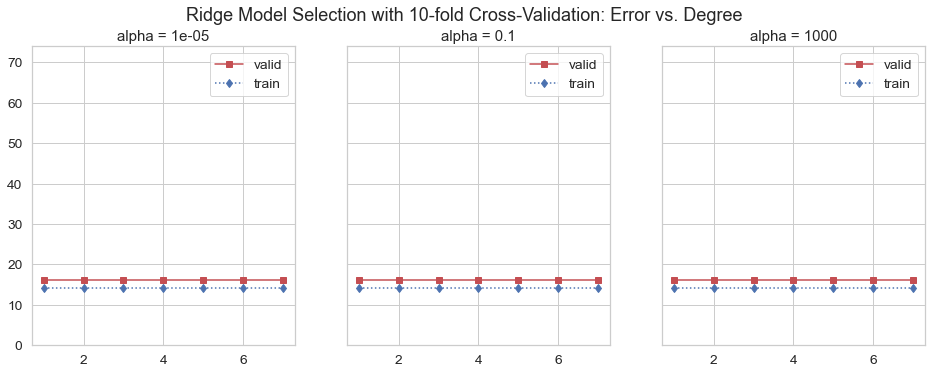

In [41]:
fig, ax_grid = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(16, 5.5))

for aa, alpha in enumerate([0.00001, 0.1, 1000.0]):
    # Find the elements of the param list that correspond to setting alpha to specific value
    match_ids = [pp for pp in range(len(ridge_param_list)) if np.allclose(alpha, ridge_param_list[pp]['alpha'])]
    train_err = np.asarray(ridge_cv_err_tr_list)[match_ids]
    test_err = np.asarray(ridge_cv_err_va_list)[match_ids]

    # Select which panel (of the 3 in figure) to be current active axis
    cur_ax = ax_grid[aa]
    plt.sca(cur_ax);
    
    # Set the title of the active axis
    cur_ax.set_title('alpha = %.5g' % alpha)

    # Draw line plot in active axis
    plot_train_and_valid_error_vs_degree(degree_list, train_err, test_err)

plt.suptitle('Ridge Model Selection with 10-fold Cross-Validation: Error vs. Degree');
plt.savefig('figure3-3_panels_by_alpha-err_vs_degree-seed=%d.pdf' % SEED, pad_inches=0, bbox_inches='tight')

### Prediction 3: Score on the test set using the chosen model


In [22]:
print("Selected Parameters (alpha and degree):")
print("TODO")
print("10-fold CV estimate of heldout error:")
print("TODO")
print("Error on the test-set:")
print("TODO")

Selected Parameters (alpha and degree):
TODO
10-fold CV estimate of heldout error:
TODO
Error on the test-set:
TODO
